In [1]:
!{__import__('sys').executable} -m pip install --quiet -r requirements.txt

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [28]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

In [3]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [4]:
import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [46]:
import pandas as pd

import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=True
)


import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
import sklearn.svm

import xgboost

import numpy as np

In [6]:
import sklearnex
sklearnex.patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Dataset

In [7]:
# TODO

dataset_lyrics = None
with fs_dataset.open('https://github.com/cse158-fa22-team-pushystrokers/datasets/raw/main/dataset-lyrics.csv.gz') as f:
    dataset_lyrics = (
        pd.read_csv(
            f, 
            compression='gzip'
        ).astype({
            'artist': 'category',
            'year': 'datetime64',
            'genre': 'category'
        }, copy=False)
    )

In [8]:
dataset_lyrics

,song,year,artist,genre,lyrics
0,ego-remix,2009-01-01,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,then-tell-me,2009-01-01,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,honesty,2009-01-01,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009-01-01,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,black-culture,2009-01-01,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
...,...,...,...,...,...
235989,who-am-i-drinking-tonight,2012-01-01,edens-edge,Country,"I gotta say Boy, after only just a couple of d..."
235990,liar,2012-01-01,edens-edge,Country,I helped you find her diamond ring You made me...
235991,last-supper,2012-01-01,edens-edge,Country,Look at the couple in the corner booth Looks a...
235992,christ-alone-live-in-studio,2012-01-01,edens-edge,Country,When I fly off this mortal earth And I'm measu...


In [9]:
dataset_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235994 entries, 0 to 235993
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   song    235993 non-null  object        
 1   year    235994 non-null  datetime64[ns]
 2   artist  235994 non-null  category      
 3   genre   235994 non-null  category      
 4   lyrics  235994 non-null  object        
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 6.7+ MB


In [10]:
# TODO
# example
dataset_lyrics[dataset_lyrics['artist'] == 'florida-georgia-line']

,song,year,artist,genre,lyrics
114040,take-it-out-on-me,2013-01-01,florida-georgia-line,Country,What'd he do this time? Did he break your hear...
114041,hands-on-you,2013-01-01,florida-georgia-line,Country,"When I get my hands on you, I'm gonna do every..."
114042,headphones,2013-01-01,florida-georgia-line,Country,You were a whip around town Tinted windows dow...
114043,people-back-home,2013-01-01,florida-georgia-line,Country,This is for my people back home We're lighting...
114044,cruise-remix,2013-01-01,florida-georgia-line,Country,Baby you a song You make me wanna roll my wind...
114045,this-is-how-we-roll,2013-01-01,florida-georgia-line,Country,"The mix tape's got a little Hank, little Drake..."
114046,tell-me-how-you-like-it,2012-01-01,florida-georgia-line,Country,Do you like it when the meter's jumpin'? You l...
114047,party-people,2012-01-01,florida-georgia-line,Country,Hey hey hey hey Where my party people Oh oh oh...
114048,dayum-baby,2012-01-01,florida-georgia-line,Country,"Hey baby, listen you got me twistin', watching..."
114049,round-here,2012-01-01,florida-georgia-line,Country,"A hammer and a nail, stacking them bails I'm d..."


## EDA

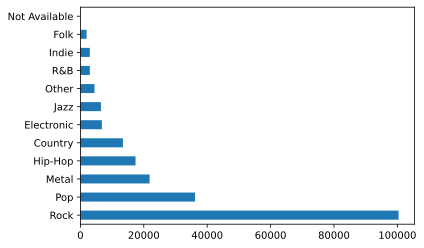

In [23]:
_ = dataset_lyrics['genre'].value_counts().plot(kind='barh')

In [ ]:
#dataset_lyrics.drop(dataset_lyrics.index[dataset_lyrics['genre'] == 'Not Available'], inplace=True)

In [22]:
dataset_lyrics = dataset_lyrics[dataset_lyrics['genre'] != 'Not Available']

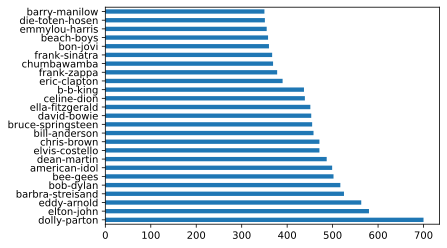

In [13]:
_ = dataset_lyrics['artist'].value_counts().head(25).plot(kind='barh')

In [14]:
import wordcloud

In [30]:
df_genre_lyrics = dataset_lyrics.groupby('genre')['lyrics'].agg(' '.join)

In [31]:
df_genre_lyrics

genre
Country          Verse 1: When the last, breath of life Is gone...
Electronic       (Reverse) Behold the finite set of thirteen co...
Folk             Rise and fall, like the tide My hand goes with...
Hip-Hop          (horns)... (chorus) Timbo- When you hit me on ...
Indie            Don't feel so bad, It's just the way the wheel...
Jazz             If I've had my way I'd leave here today I'd le...
Metal            Gods Of The Mountains Sky, Forest And Seas Lan...
Not Available                                                     
Other            (A little thin band, her finger left hand) She...
Pop              Oh baby, how you doing? You know I'm gonna cut...
R&B              (Little wallflower on the shelf, standing by h...
Rock             A lot of cats are hatin', slandering makin' ba...
Name: lyrics, dtype: object

In [47]:
import joblib

def _df_lyrics_generate_wordclouds_per_genre(df):
    df_genre_lyrics = df.groupby('genre', observed=True)['lyrics'].agg(' '.join)
    def _f(lyrics):
        wc = wordcloud.WordCloud(background_color=None, mode='RGBA')
        return wc, wc.generate(lyrics)
    return df_genre_lyrics.swifter.apply(_f)

/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


Dask Apply:   0%|          | 0/10 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/conda/lib/python3.9/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index

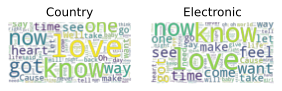

In [50]:
df_wcs = _df_lyrics_generate_wordclouds_per_genre(dataset_lyrics)

fig, axs = subplots(n=len(df_wcs), ncols=3)
for ax, (genre, lyrics), (_, (wc, im)) in zip(
    axs.flatten(), 
    df_genre_lyrics.items(), 
    df_wcs.items()
):
    ax.set(visible=True, title=genre)
    ax.axis('off')
    ax.imshow(im)
fig.show()

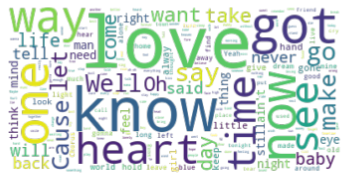

In [16]:
wc = wordcloud.WordCloud(background_color=None, mode='RGBA')

im = wc.generate(l.Country)

plt.imshow(im, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
wc.to_svg()



'<svg xmlns="http://www.w3.org/2000/svg" width="400" height="200">\n<style>text{font-family:\'Droid Sans Mono\';font-weight:normal;font-style:normal;}</style>\n<text transform="translate(117,119)" font-size="104" style="fill:rgb(56, 88, 140)">love</text>\n<text transform="translate(14,182)" font-size="82" style="fill:rgb(62, 76, 138)">know</text>\n<text transform="translate(258,168)" font-size="71" style="fill:rgb(33, 165, 133)">now</text>\n<text transform="translate(192,43)" font-size="62" style="fill:rgb(124, 210, 80)">want</text>\n<text transform="translate(2,95)" font-size="59" style="fill:rgb(197, 224, 33)">feel</text>\n<text transform="translate(12,28)" font-size="50" style="fill:rgb(46, 111, 142)">see</text>\n<text transform="translate(335,29)" font-size="35" style="fill:rgb(47, 107, 142)">got</text>\n<text transform="translate(251,197) rotate(-90)" font-size="34" style="fill:rgb(112, 207, 87)">time</text>\n<text transform="translate(30,117)" font-size="33" style="fill:rgb(53, 1

## Predictive Task

## Model

### Baseline Model

In [14]:
def make_dataframe_transformer(cls):
    class cls_(cls):
        def transform(self, *args, **kwargs):
            res = super().transform(*args, **kwargs)
            if isinstance(res, pd.Series):
                return res.to_frame()
            return pd.DataFrame(res)
    return cls_

#### Category Transformer

In [15]:
cat_transformer_baseline = (
    skl.preprocessing.OneHotEncoder(
        handle_unknown='ignore'
    )
)

#### Text Transformer

In [16]:
import joblib

class BaseParallelTransformer(skl.base.TransformerMixin):
    def __init__(self, n_jobs, func, kwargs_func={}):
        super().__init__()
        self.n_jobs = n_jobs
        self.func = func
        self.kwargs_func = kwargs_func

    def fit(self, _X, _y=None):
        return self

    def transform(self, Xs, _y=None):
        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(self.func)(X, **self.kwargs_func) 
                for X in Xs
        )

In [17]:
import nltk
nltk.download('omw-1.4')

class WordTokenizer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        super().__init__(
            n_jobs=n_jobs,
            func=nltk.word_tokenize,
            kwargs_func=kwargs
        )

class WordNetLemmatizer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        base = nltk.stem.WordNetLemmatizer()
        super().__init__(
            n_jobs=n_jobs,
            func=lambda tokens: list(map(base.lemmatize, tokens)),
            kwargs_func=kwargs
        )

class SnowballStemmer(BaseParallelTransformer):
    def __init__(self, n_jobs=1, **kwargs):
        base = nltk.stem.SnowballStemmer(**kwargs)
        super().__init__(
            n_jobs=n_jobs,
            func=lambda tokens: list(map(base.stem, tokens)),
            kwargs_func={}
        )

[nltk_data] Downloading package omw-1.4 to /home/r8chen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
import string

tokens_blocked = (
    set(nltk.corpus.stopwords.words('english'))
        | set(string.punctuation)
)
tokenizer_baseline = skl.pipeline.Pipeline([
    ('filter_cap',
        BaseParallelTransformer(
            n_jobs=-1, 
            func=lambda text: text.lower() 
        )
    ),
    ('tokenizer', WordTokenizer(n_jobs=-1, language='english')),
    ('filter_tokens', 
        BaseParallelTransformer(
            n_jobs=-1, 
            func=lambda tokens: filter(
                lambda token: token not in tokens_blocked,
                tokens
            )
        )
    ),
    ('lemmatizer', WordNetLemmatizer(n_jobs=-1)),
    ('stemmer', SnowballStemmer(n_jobs=-1, language='english'))
])

In [19]:
text_transformer_baseline = skl.pipeline.Pipeline([
    *tokenizer_baseline.steps,
    ('token_count_vec', 
        skl.feature_extraction.text.CountVectorizer(
            tokenizer=lambda x: x,
            preprocessor=None,
            lowercase=False    
        )
    ),
    ('token_freq_vec', 
        skl.feature_extraction.text.TfidfTransformer()
    ),
])

#### Pipeline: Model

In [20]:
model_cv_baseline = skl.model_selection.GridSearchCV(
    skl.linear_model.LogisticRegression(
        max_iter=1000
    ),
    param_grid={
        'class_weight': ['balanced'],
        'solver': ['saga'],
        'C': np.logspace(start=-2, stop=-1, num=3),
    }, 
    cv=skl.model_selection.RepeatedStratifiedKFold(n_splits=2, n_repeats=1),
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=3
)

In [21]:
model_cv_gboost = skl.model_selection.GridSearchCV(
    xgboost.XGBClassifier(
        booster='gbtree',
        objective='multi:softmax',
        tree_method='gpu_hist', 
        predictor='gpu_predictor',
        sampling_method='gradient_based',
        enable_categorical=True,
        n_jobs=-1
    ),
    param_grid={
        'learning_rate': [.1, .005],
        'n_estimators': [200],
        'max_depth': [30],
        'subsample': [.75],

        #'gamma': [.1],
        #'reg_alpha': [.1],
        #'reg_lambda': [.1]
    },
    cv=skl.model_selection.RepeatedStratifiedKFold(n_splits=2, n_repeats=1),
    scoring='balanced_accuracy',
    #n_jobs=-1,
    verbose=3
)

####

In [26]:
predictor_baseline = skl.pipeline.Pipeline([
    ('feature_sel', skl.compose.ColumnTransformer([
        #('cat', cat_transformer_baseline, ['artist']),
        ('text', text_transformer_baseline, 'lyrics')
    ])),#, n_jobs=-1)),
    #('scaler', skl.preprocessing.StandardScaler()),
    ('classifier_cv', model_cv_baseline)
    #('classifier_cv', model_cv_gboost)
])

df_lyrics = dataset_lyrics#.sample(10000)
_ = predictor_baseline.fit(
    #df_lyrics[['artist', 'lyrics']],
    df_lyrics[['lyrics']],
    df_lyrics['genre']
)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 2/2] END C=0.01, class_weight=balanced, solver=saga;, score=0.334 total time=  21.3s
[CV 1/2] END C=0.01, class_weight=balanced, solver=saga;, score=0.340 total time=  23.8s
[CV 2/2] END C=0.03162277660168379, class_weight=balanced, solver=saga;, score=0.364 total time=  26.7s
[CV 1/2] END C=0.03162277660168379, class_weight=balanced, solver=saga;, score=0.369 total time=  29.4s
[CV 2/2] END C=0.1, class_weight=balanced, solver=saga;, score=0.385 total time= 2.1min
[CV 1/2] END C=0.1, class_weight=balanced, solver=saga;, score=0.388 total time= 2.6min


In [28]:
predictor_baseline.named_steps['classifier_cv'].best_params_

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'saga'}

In [29]:
predictor_baseline.named_steps['classifier_cv'].best_score_

0.3868556531060328